<a href="https://colab.research.google.com/github/bluepeach1121/Pytorch_tutorials/blob/main/02NN_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#02. Neural network classification with PyTorch

classification is a problem of predicting whether something is one thing or another (there can be multiple things as the options).

##1. make classification data and get it ready



In [2]:
import sklearn


In [3]:
from sklearn.datasets import make_circles

#make 100 samples
n_samples = 1000

#create cirlces
X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

In [4]:
len(X), len(y)

(1000, 1000)

In [5]:
print(f'first 5 samples of X:\n {X[:5]}')
print(f'first 5 samples of y: {y[:5]}')

first 5 samples of X:
 [[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]
first 5 samples of y: [1 1 1 1 0]


In [6]:
y

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,

In [7]:
#make DataFrame of circle data
import pandas as pd
circles = pd.DataFrame({'X1': X[:, 0],
                        'X2': X[:, 1],
                        'label': y})
circles.head(10)

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


In [8]:
circles.label.value_counts()

label
1    500
0    500
Name: count, dtype: int64

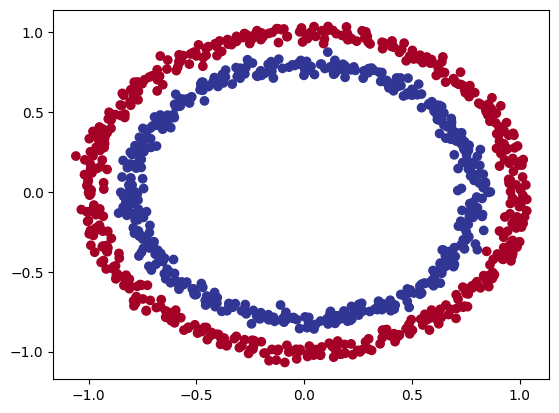

In [9]:
#visualize
import matplotlib.pyplot as plt
plt.scatter(x=X[:, 0],
            y=X[:, 1],
            c=y,
            cmap=plt.cm.RdYlBu);

In [10]:
from matplotlib import colormaps
list(colormaps)

['magma',
 'inferno',
 'plasma',
 'viridis',
 'cividis',
 'twilight',
 'twilight_shifted',
 'turbo',
 'Blues',
 'BrBG',
 'BuGn',
 'BuPu',
 'CMRmap',
 'GnBu',
 'Greens',
 'Greys',
 'OrRd',
 'Oranges',
 'PRGn',
 'PiYG',
 'PuBu',
 'PuBuGn',
 'PuOr',
 'PuRd',
 'Purples',
 'RdBu',
 'RdGy',
 'RdPu',
 'RdYlBu',
 'RdYlGn',
 'Reds',
 'Spectral',
 'Wistia',
 'YlGn',
 'YlGnBu',
 'YlOrBr',
 'YlOrRd',
 'afmhot',
 'autumn',
 'binary',
 'bone',
 'brg',
 'bwr',
 'cool',
 'coolwarm',
 'copper',
 'cubehelix',
 'flag',
 'gist_earth',
 'gist_gray',
 'gist_heat',
 'gist_ncar',
 'gist_rainbow',
 'gist_stern',
 'gist_yarg',
 'gnuplot',
 'gnuplot2',
 'gray',
 'hot',
 'hsv',
 'jet',
 'nipy_spectral',
 'ocean',
 'pink',
 'prism',
 'rainbow',
 'seismic',
 'spring',
 'summer',
 'terrain',
 'winter',
 'Accent',
 'Dark2',
 'Paired',
 'Pastel1',
 'Pastel2',
 'Set1',
 'Set2',
 'Set3',
 'tab10',
 'tab20',
 'tab20b',
 'tab20c',
 'magma_r',
 'inferno_r',
 'plasma_r',
 'viridis_r',
 'cividis_r',
 'twilight_r',
 'twilight

Note: the data we're working with is often refered to as a toy dataset

### 1.1 check input and output shapes

In [11]:
X.shape, y.shape

((1000, 2), (1000,))

In [12]:
# view the first example of features and labels
X_sample = X[0]
y_sample = y[0]

print(f'values for one sample of X:{X_sample} and the same for y: {y_sample}')
print(f'shapes for one sample of X: {X_sample.shape} and the same for y: {y_sample.shape}')

values for one sample of X:[0.75424625 0.23148074] and the same for y: 1
shapes for one sample of X: (2,) and the same for y: ()


### 1.2 Turn data into tensors and create train and test split

In [13]:
import torch
torch.__version__

'2.3.0+cu121'

In [14]:
type(X)

numpy.ndarray

In [15]:
# turn data into tensors
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

In [16]:
X[:5], y[:5]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]))

In [17]:
type(X), X.dtype, y.dtype

(torch.Tensor, torch.float32, torch.float32)

In [18]:
# split data data into training and testing data set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,# 20% of the test and 80% will be for training
                                                    random_state= 42)

In [19]:
len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

## 2. Building a model

lets build a model to classiffy our blue and red dots..

To do so, we want to:
1. setup device agnostic code so our code will run on gpu if there is one
2. construct a model (by subclassing `nn.module)
3. define a loss function and optimizer
4. create a test and training loop

In [20]:
# Im pytorch and nn
import torch
from torch import nn

#make device agnostic code
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cpu'

In [21]:
X_train

tensor([[ 0.6579, -0.4651],
        [ 0.6319, -0.7347],
        [-1.0086, -0.1240],
        ...,
        [ 0.0157, -1.0300],
        [ 1.0110,  0.1680],
        [ 0.5578, -0.5709]])

# now we've setup device agnostic dode, lets creat a model that:

1. subclasses `nn.Module` (almost all models in pytorch subclass `nn.Module`)
2. create 2 `nn.linear()` layers that are capable of handling the shape of our data
3. Defines a `forward()` method that outlines the forward pass of the model
4. Instantiate an instance of our model class and send it to the target `device`


In [22]:
X_train.shape

torch.Size([800, 2])

In [23]:
#1. construct a model that subclasses nn.module

class CirclemodelV0(nn.Module):
    def __init__(self):
        super().__init__()
        #2. create 2 nn.linear layers capable of handling the shape of our data
        self.layer_1 = nn.Linear(in_features = 2, out_features=8) #takes in 2 features and upscales to 8 features
        self.layer_2 = nn.Linear(in_features = 8, out_features= 1) # takes in 8 features from previous layer and outputs a single feature (same shape as y)

    # 3. define a forward method that outlines the forward pass
    def forward(self, x):
        return self.layer_2(self.layer_1(x)) #x -> layer_1 -> layer_2 -> output

    #4. instantiate an instance of our model class and sent it to our target device
model_0 = CirclemodelV0().to(device)
model_0

CirclemodelV0(
  (layer_1): Linear(in_features=2, out_features=8, bias=True)
  (layer_2): Linear(in_features=8, out_features=1, bias=True)
)

In [24]:
device

'cpu'

In [25]:
next(model_0.parameters()).device

device(type='cpu')

In [26]:
#lets replicate the model above using nn.Sequential()
model_0 = nn.Sequential(
    nn.Linear(in_features=2, out_features =8),
    nn.Linear(in_features=8, out_features=1)
    ).to(device)

model_0

Sequential(
  (0): Linear(in_features=2, out_features=8, bias=True)
  (1): Linear(in_features=8, out_features=1, bias=True)
)

In [27]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[ 0.3216,  0.1462],
                      [ 0.2611, -0.3890],
                      [ 0.0158,  0.4040],
                      [-0.3839,  0.1515],
                      [ 0.2194,  0.5021],
                      [ 0.5139,  0.3385],
                      [-0.1094,  0.1218],
                      [-0.1306, -0.0153]])),
             ('0.bias',
              tensor([-0.3425, -0.3676,  0.5813,  0.6261, -0.6232, -0.5519, -0.0958, -0.6789])),
             ('1.weight',
              tensor([[-0.2432, -0.1887, -0.0051, -0.1822,  0.1503,  0.1018,  0.3276,  0.0101]])),
             ('1.bias', tensor([-0.3519]))])

In [28]:
#make predictions
with torch.inference_mode():
    untrained_preds = model_0(X_test.to(device))
print(f"length of prediction: {len(untrained_preds)}, shape: {untrained_preds.shape}")
print(f'length of test samples: {len(X_test)}, shape: {X_test.shape}')
print(f'\nFirst 10 predictions:\n {torch.round(untrained_preds[:10])}')
print(f'\nFirst 10 labels: \n {y_test[:10]}')

length of prediction: 200, shape: torch.Size([200, 1])
length of test samples: 200, shape: torch.Size([200, 2])

First 10 predictions:
 tensor([[-0.],
        [-0.],
        [-1.],
        [-0.],
        [-1.],
        [-1.],
        [-0.],
        [-0.],
        [-1.],
        [-0.]])

First 10 labels: 
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


In [29]:
X_test[:10], y_test[:10]

(tensor([[-0.3752,  0.6827],
         [ 0.0154,  0.9600],
         [-0.7028, -0.3147],
         [-0.2853,  0.9664],
         [ 0.4024, -0.7438],
         [ 0.6323, -0.5711],
         [ 0.8561,  0.5499],
         [ 1.0034,  0.1903],
         [-0.7489, -0.2951],
         [ 0.0538,  0.9739]]),
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.]))

### 2.1 setup loss function and optimizer

which loss function or optimizer should you use?

its problem specific
for regression, you might want to use MSE or MAE
for classification, binary cross-entropy loss maybe more appropraite

and for optimizers, 2 of the most common and useful are SDG and Adam

* for the loss function, we're going to use `torch.nn.BCEWithLogitsLoss()`

In [30]:
#setup the loss function
loss_fn = nn.BCEWithLogitsLoss()

optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.1)

In [31]:
#calculate accuracy -->out of a 100 examples, what percentage does our algorithm gets right?
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct/len(y_pred)) * 100
    return acc

##3. train model
To train our model, we're going to need to build a training loop:
1. Forward pass
2. calculate the loss
3. optimize zero grad.
4. Backpropagation
5. Optimizer Step

### 3.1 going frm raw logits -> prediction probabilities -> prediction labels

Our model outputs are going to be raw **logits**

we can convert these **logits** into **prediction probabilities** by passing them to some kind of activation function (e.g. sigmoid crossentropy and softmax for multiclass classification problems).

Then we can convert our model's prediction probabilities to **prediction label** by eith rounding them or taking the `argmax()`

In [32]:
# view the first 5 outputs of the forward pass on the test data
model_0.eval()
with torch.inference_mode():
    y_logits = model_0(X_test.to(device))[:5]
y_logits

tensor([[-0.3930],
        [-0.3529],
        [-0.5474],
        [-0.3491],
        [-0.6256]])

In [33]:
y_test[:5], y_train[:5]

(tensor([1., 0., 1., 0., 1.]), tensor([1., 0., 0., 0., 1.]))

In [34]:
# use the sigmoid activation function on our activation function logits to turn thmm into prediction probabiites
y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs

tensor([[0.4030],
        [0.4127],
        [0.3665],
        [0.4136],
        [0.3485]])

for our prediction probability values, we need to perform a range-style rounding on them:
* `y_pred_probs` >= 0.5, `y=1` (class 1)
* `y_pred_probs` < 0.5, `y=0` (class 0)

In [35]:
#find the predicted labels
y_preds = torch.round(y_pred_probs)

# in full (logits -> pred probs -> pred labels)
y_pred_labels = torch.round(torch.sigmoid(model_0(X_test.to(device))[:5]))

#check for equality
print(torch.eq(y_preds.squeeze(), y_pred_labels.squeeze()))

# squeeze is to get rid of the extra dimension
y_preds.squeeze()

tensor([True, True, True, True, True])


tensor([0., 0., 0., 0., 0.])

In [36]:
y_test[:5]

tensor([1., 0., 1., 0., 1.])

In [37]:
## 3.2  Building a traning and testing loop

In [38]:
device

'cpu'

In [39]:
torch.manual_seed(42)

#set the number of epochs
epochs = 100
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

#build training and evaluation loop
for epoch in range(epochs):
    ###Training
    model_0.train()

    #1. Forward pass
    y_logits = model_0(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits)) #turn logits -> pred probs -> pred labels

    #2. calculate loss/accuracy
    # loss = loss_fn(torch.sigmoid(y_logits), # nn.BCE expects prediction probabilities as input
    #                y_train)
    loss = loss_fn(y_logits, # nn.BCEWithLogitsLoss expects raw logits as input
                   y_train)
    acc = accuracy_fn(y_true=y_train,
                      y_pred=y_pred)

    #3. Optimizer zero grad
    optimizer.zero_grad()

    #loss backward (backpropagation)
    loss.backward()

    #5. optimizer step ( gradient descent)
    optimizer.step()

    ### testing
    model_0.eval()
    with torch.inference_mode():
        #1. forward pass
        test_logits = model_0(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))

        #2. calculate test loss/acc
        test_loss = loss_fn(test_logits,
                            y_test)
        test_acc = accuracy_fn(y_true=y_test,
                               y_pred=test_pred)

    #print out whats happening
    if epoch % 10 ==0:
        print(f'epoch: {epoch} <-> loss: {loss: .5f}, Acc: {acc: .2f}% <-> test loss: {test_loss:.5f}, test acc: {test_acc: 2f}%')

epoch: 0 <-> loss:  0.72532, Acc:  50.00% <-> test loss: 0.72278, test acc:  50.000000%
epoch: 10 <-> loss:  0.69959, Acc:  50.00% <-> test loss: 0.70085, test acc:  50.000000%
epoch: 20 <-> loss:  0.69510, Acc:  48.25% <-> test loss: 0.69689, test acc:  43.500000%
epoch: 30 <-> loss:  0.69424, Acc:  48.38% <-> test loss: 0.69605, test acc:  50.000000%
epoch: 40 <-> loss:  0.69398, Acc:  49.50% <-> test loss: 0.69576, test acc:  52.000000%
epoch: 50 <-> loss:  0.69383, Acc:  48.75% <-> test loss: 0.69560, test acc:  52.000000%
epoch: 60 <-> loss:  0.69372, Acc:  49.12% <-> test loss: 0.69547, test acc:  51.500000%
epoch: 70 <-> loss:  0.69363, Acc:  49.62% <-> test loss: 0.69537, test acc:  51.000000%
epoch: 80 <-> loss:  0.69355, Acc:  49.62% <-> test loss: 0.69528, test acc:  51.000000%
epoch: 90 <-> loss:  0.69348, Acc:  49.75% <-> test loss: 0.69520, test acc:  51.000000%


## 4. make predictions and evaluate the model

from the metrics, it looks like our model isnt learning anything....

so to inspect it lets make some predictions and make them visual!

to do so

In [40]:
import requests
from pathlib import Path as path

#downlaod help functions from the learn pytorch repo
if path('helper_functions.py').is_file():
    print('helper_functions.py already exists, skipping download')
else:
    print('downloading helper_functions.py')
    request = requests.get('https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py')
    with open('helper_functions.py', 'wb' ) as f:
        f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

downloading helper_functions.py


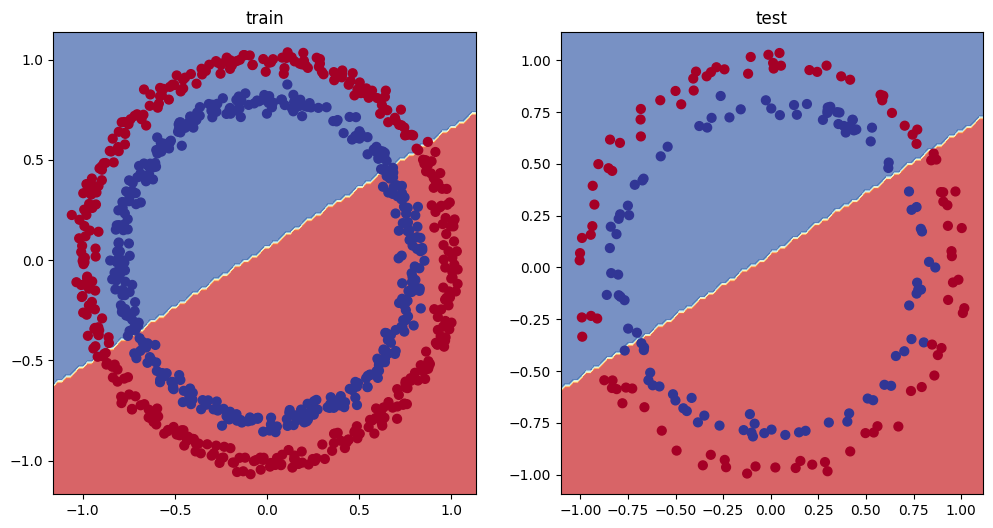

In [41]:
# plot decision boundary of the model
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('train')
plot_decision_boundary(model_0, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title('test')
plot_decision_boundary(model_0, X_test, y_test)

# 5. improving a model(from a model perspective)

* add more layers --> give the models more chance to learn about patterns in the data
* add more hidden units --> go from 5 hidden units to 10 hidden units
* fit for longer
* changing the activation functions
* change the learning rate
* change the loss function

These options are all from a model's perspective becauce they deal with the model rather than the data.

* lets try to improve our model by:👇

    * adding more hidden units 8 -> 10

    * increase the number of layers

    * increase the number of epochs: 100 -> 1000

In other situations, we change the paramters one by one to get a better understanding of the problem



In [42]:
class CircleModelV1(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2, out_features=10)
        self.layer_2 = nn.Linear(in_features=10, out_features=10)
        self.layer_3 = nn.Linear(in_features=10, out_features=1)

    def forward(self, x):
        # z = self.layer_1(x)
        # z = self.layer_2(z)
        # z = self.layer_3(z)
        return self.layer_3(self.layer_2(self.layer_1(x))) #this way of writing operations leverages speedups behind the scene

model_1 = CircleModelV1().to(device)
model_1

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [43]:
loss_fn = nn.BCEWithLogitsLoss()

optimizer = torch.optim.Adam(params=model_1.parameters(),
                            lr=0.1)

In [44]:
model_1.state_dict()

OrderedDict([('layer_1.weight',
              tensor([[ 0.5406,  0.5869],
                      [-0.1657,  0.6496],
                      [-0.1549,  0.1427],
                      [-0.3443,  0.4153],
                      [ 0.6233, -0.5188],
                      [ 0.6146,  0.1323],
                      [ 0.5224,  0.0958],
                      [ 0.3410, -0.0998],
                      [ 0.5451,  0.1045],
                      [-0.3301,  0.1802]])),
             ('layer_1.bias',
              tensor([-0.3258, -0.0829, -0.2872,  0.4691, -0.5582, -0.3260, -0.1997, -0.4252,
                       0.0667, -0.6984])),
             ('layer_2.weight',
              tensor([[ 0.2856, -0.2686,  0.2441,  0.0526, -0.1027,  0.1954,  0.0493,  0.2555,
                        0.0346, -0.0997],
                      [ 0.0850, -0.0858,  0.1331,  0.2823,  0.1828, -0.1382,  0.1825,  0.0566,
                        0.1606, -0.1927],
                      [-0.3130, -0.1222, -0.2426,  0.2595,  0.0911,  0.1

In [45]:
#write a training and evaluation loop for model_1
torch.manual_seed(42)
torch.cuda.manual_seed(42)

#train for longer
epochs = 1000

#put data data on the target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
    ###training
    model_1.train()
    #1. forward pass
    y_logits = model_1(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits))# logits -> pred prbabilities -> predictions

    #2 calculate the loss/ acc
    loss = loss_fn(y_logits, y_train)
    acc = accuracy_fn(y_true=y_train,
                      y_pred=y_pred)
    #3. optimizer zero grad
    optimizer.zero_grad()

    #4. loss backward (backpropagation)
    loss.backward()

    #5. optimizer step (gradient descent)

    optimizer.step()


    ### testing
    model_1.eval()
    with torch.inference_mode():
        # 1. forward pass
        test_logits = model_1(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))

        #2. calculate loss/acc
        test_loss = loss_fn(test_logits,
                            y_test)
        test_acc = accuracy_fn(y_true=y_test,
                               y_pred=test_pred)

    # print out whats happening every 10 epochs
    if epoch % 100 ==0:
        print(f'epoch: {epoch}--> loss: {loss: 5f} - acc: {acc: 2f} - test_loss: {test_loss: 5f} - test_acc: {test_acc: 2f}')


epoch: 0--> loss:  0.693955 - acc:  50.875000 - test_loss:  0.793029 - test_acc:  50.000000
epoch: 100--> loss:  0.692980 - acc:  51.500000 - test_loss:  0.694696 - test_acc:  45.500000
epoch: 200--> loss:  0.693169 - acc:  48.750000 - test_loss:  0.695051 - test_acc:  47.000000
epoch: 300--> loss:  0.692980 - acc:  51.125000 - test_loss:  0.694679 - test_acc:  46.000000
epoch: 400--> loss:  0.692980 - acc:  51.000000 - test_loss:  0.694680 - test_acc:  46.000000
epoch: 500--> loss:  0.692980 - acc:  51.000000 - test_loss:  0.694680 - test_acc:  46.000000
epoch: 600--> loss:  0.692980 - acc:  51.000000 - test_loss:  0.694680 - test_acc:  46.000000
epoch: 700--> loss:  0.692980 - acc:  51.000000 - test_loss:  0.694680 - test_acc:  46.000000
epoch: 800--> loss:  0.692980 - acc:  51.000000 - test_loss:  0.694680 - test_acc:  46.000000
epoch: 900--> loss:  0.692980 - acc:  51.000000 - test_loss:  0.694680 - test_acc:  46.000000


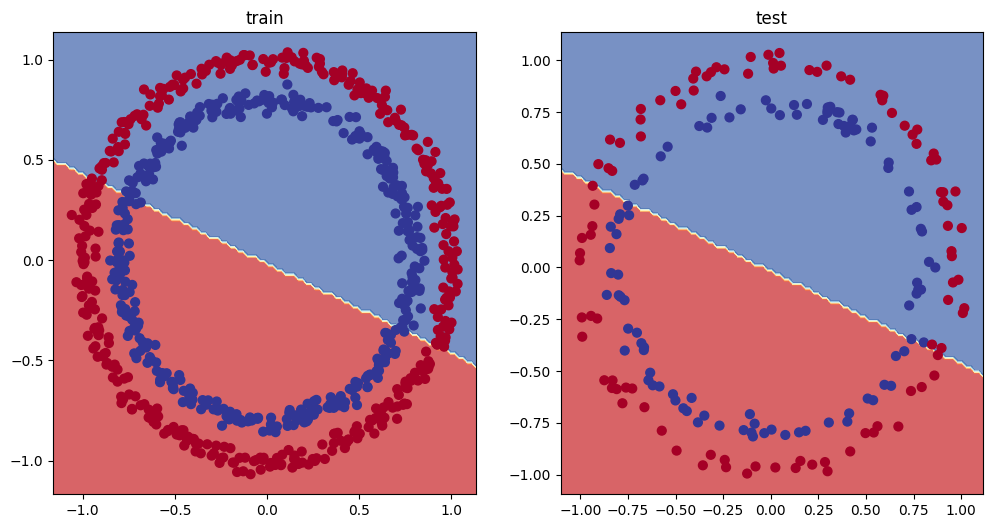

In [46]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('train')
plot_decision_boundary(model_1, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title('test')
plot_decision_boundary(model_1, X_test, y_test)

### 5.1. preparing data to see if our model can fit a straight line

One way to troubleshoot to a larger problem is to test out a smaller


In [47]:
#create some data (same as notebook 01)

weight = 0.7
bias = 0.3
start = 0
end = 1
step = 0.01

#create data
X_regression = torch.arange(start, end, step).unsqueeze(dim=1)
y_regression = weight * X_regression + bias

#check the data
print(len(X_regression))
X_regression[:5], y_regression[:5]

100


(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400]]),
 tensor([[0.3000],
         [0.3070],
         [0.3140],
         [0.3210],
         [0.3280]]))

In [48]:
# create train and test splits
train_split = int(0.8 * len(X_regression))
X_train_regression, y_train_regression = X_regression[:train_split], y_regression[:train_split]
X_test_regression, y_test_regression = X_regression[train_split:], y_regression[train_split:]

#check the length of each
len(X_train_regression), len(X_test_regression), len(y_train_regression), len(y_test_regression)

(80, 20, 80, 20)

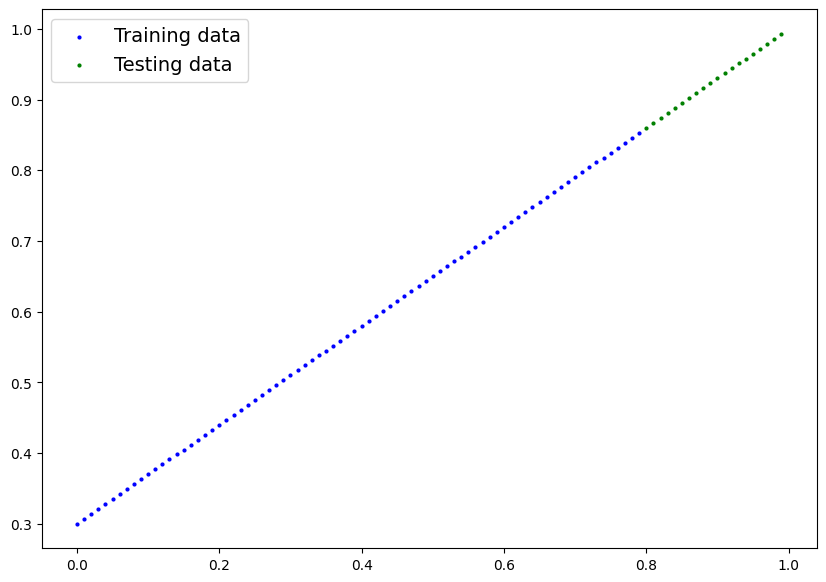

In [49]:
plot_predictions(train_data=X_train_regression,
                 train_labels=y_train_regression,
                 test_data=X_test_regression,
                 test_labels=y_test_regression);

###5.2 adjusting `model_1` to fit a straight line

In [50]:
#same architecture as model_1 (but using nn.Sequential())
model_2 = nn.Sequential(
    nn.Linear(in_features=1, out_features=10),
    nn.Linear(in_features=10, out_features=10),
    nn.Linear(in_features=10, out_features=1)
).to(device)

model_2

Sequential(
  (0): Linear(in_features=1, out_features=10, bias=True)
  (1): Linear(in_features=10, out_features=10, bias=True)
  (2): Linear(in_features=10, out_features=1, bias=True)
)

In [51]:
loss_fn =nn.L1Loss()
optimizer = torch.optim.Adam(params=model_2.parameters(),
                             lr=0.01)

In [52]:
#train the model
torch.manual_seed(42)
torch.cuda.manual_seed(42)

#set  the number of epochs
epoch = 1000

#put the data on the target device
X_train_regression, y_train_regression = X_train_regression.to(device), y_train_regression.to(device)
X_test_regression, y_test_regression = X_test_regression.to(device), y_test_regression.to(device)

#training
for epoch in range(epochs):
    y_pred = model_2(X_train_regression)
    loss = loss_fn(y_pred, y_train_regression)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    #training
    model_2.eval()
    with torch.inference_mode():
        test_pred = model_2(X_test_regression)
        test_loss = loss_fn(test_pred, y_test_regression)

    #print out whats happening
    if epoch % 100 == 0:
        print(f'epoch: {epoch} -->loss: {loss: .5f} --> test loss: {test_loss: .5f}')

epoch: 0 -->loss:  0.75986 --> test loss:  0.77620
epoch: 100 -->loss:  0.00335 --> test loss:  0.00194
epoch: 200 -->loss:  0.00458 --> test loss:  0.01232
epoch: 300 -->loss:  0.00196 --> test loss:  0.01619
epoch: 400 -->loss:  0.01017 --> test loss:  0.02108
epoch: 500 -->loss:  0.00803 --> test loss:  0.01163
epoch: 600 -->loss:  0.00724 --> test loss:  0.00999
epoch: 700 -->loss:  0.00667 --> test loss:  0.00054
epoch: 800 -->loss:  0.00190 --> test loss:  0.00071
epoch: 900 -->loss:  0.00392 --> test loss:  0.02012


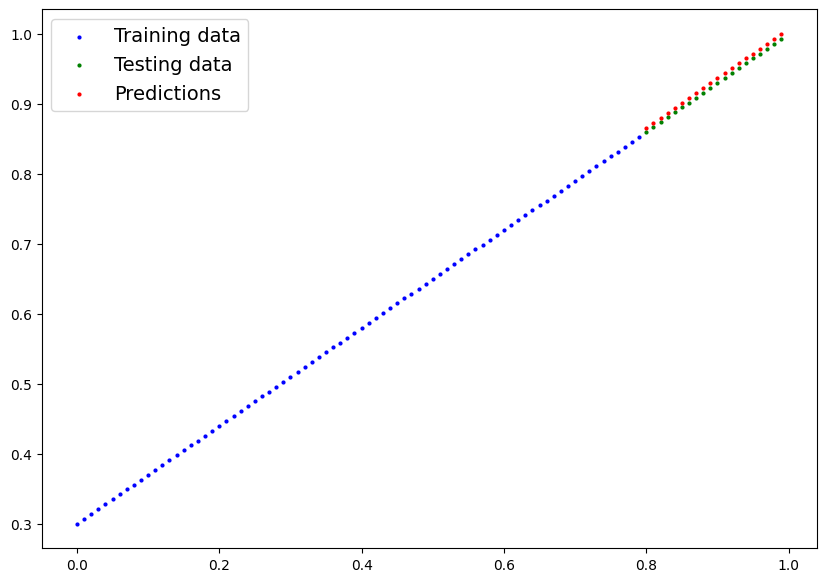

In [53]:
# turn on evaluation mode
model_2.eval()

#make predictions (inference)
with torch.inference_mode():
    y_preds = model_2(X_test_regression)

#plot data and predictions
plot_predictions(train_data=X_train_regression.cpu(),
                 train_labels=y_train_regression.cpu(),
                 test_data=X_test_regression.cpu(),
                 test_labels=y_test_regression.cpu(),
                 predictions=y_preds.cpu());

##6. The missing piece: Non-linearity

'what patterns could be deduced given an infinite amount of a straight and non-straight lines'

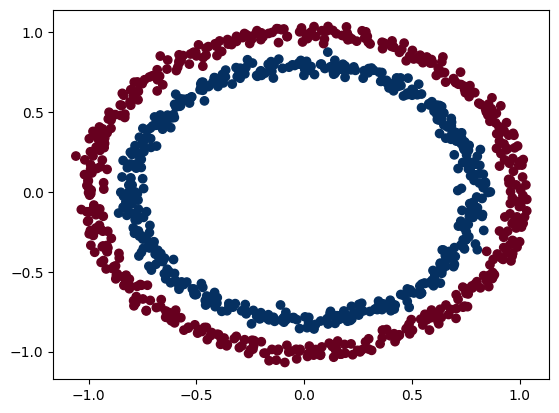

In [54]:
### 6.1 recreating non-linear data (red and blue circles)
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

n_samples = 1000

X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdBu)

In [55]:
# convert data to tensors and then to train and test splits
import torch
from sklearn.model_selection import train_test_split

# turn data into tensors
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

#split data into test and train.
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)

X_train[:5], y_train[:5]

(tensor([[ 0.6579, -0.4651],
         [ 0.6319, -0.7347],
         [-1.0086, -0.1240],
         [-0.9666, -0.2256],
         [-0.1666,  0.7994]]),
 tensor([1., 0., 0., 0., 1.]))

In [56]:
### 6.2 Building a model with non-linearity


In [57]:
# build a model with a non-linear activation function
from torch import nn
class CircleModelV2(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2, out_features=10)
        self.layer_2 = nn.Linear(in_features=10, out_features=10)
        self.layer_3 = nn.Linear(in_features=10, out_features=1)
        self.relu = nn.ReLU() #relu is a non-linear activation function

    def forward(self, x):
        # where should we put out non-linear activation functions?
        return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))

model_3 = CircleModelV2().to(device)
model_3

CircleModelV2(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

In [58]:
# set up loss and optimizer
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(model_3.parameters(),
                             lr=0.1)

## 6.3 training with non-linearity


In [59]:
len(test_logits), len(y_test)

(200, 200)

In [60]:
#random seeds
torch.manual_seed(42)
torch.cuda.manual_seed(42)

#put all data on target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

# loop through the data

epochs = 1000

for epoch in range(epochs):
    ###traning
    model_3.train()

    #1. forward pass
    y_logits = model_3(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits)) # logits -> prediction probability -> prediction labels

   #2. calculate the loss
    loss = loss_fn(y_logits,
                  y_train) #BCEWithLogitsLoss takes in logits as first input
    acc = accuracy_fn(y_true=y_train,
                      y_pred=y_pred)

    #3. optimizer zero grad
    optimizer.zero_grad()

    #4. backpropagation
    loss.backward()

    #5. step the optimizer
    optimizer.step()

    # testing
    model_3.eval()
    with torch.inference_mode():
        test_logits = model_3(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))

        test_loss = loss_fn(test_logits, y_test)
        test_acc = accuracy_fn(y_true= y_test,
                            y_pred=test_pred)
    #print out whats happening
    if epoch % 100 == 0:
        print (f'Epoch: {epoch} --> loss: {loss: .4f} --> Acc: {acc: .2f} --> test loss: {test_loss: .4f} --> Test Acc: {test_acc: .2f}%')

Epoch: 0 --> loss:  0.6929 --> Acc:  50.00 --> test loss:  0.6939 --> Test Acc:  50.00%
Epoch: 100 --> loss:  0.0017 --> Acc:  100.00 --> test loss:  0.0074 --> Test Acc:  100.00%
Epoch: 200 --> loss:  0.0007 --> Acc:  100.00 --> test loss:  0.0054 --> Test Acc:  100.00%
Epoch: 300 --> loss:  0.0004 --> Acc:  100.00 --> test loss:  0.0049 --> Test Acc:  100.00%
Epoch: 400 --> loss:  0.0003 --> Acc:  100.00 --> test loss:  0.0057 --> Test Acc:  100.00%
Epoch: 500 --> loss:  0.0002 --> Acc:  100.00 --> test loss:  0.0052 --> Test Acc:  100.00%
Epoch: 600 --> loss:  0.0001 --> Acc:  100.00 --> test loss:  0.0051 --> Test Acc:  100.00%
Epoch: 700 --> loss:  0.0001 --> Acc:  100.00 --> test loss:  0.0053 --> Test Acc:  100.00%
Epoch: 800 --> loss:  0.0001 --> Acc:  100.00 --> test loss:  0.0056 --> Test Acc:  100.00%
Epoch: 900 --> loss:  0.0001 --> Acc:  100.00 --> test loss:  0.0058 --> Test Acc:  100.00%


In [61]:
### 6.4 evaluate a model trained with nonlinear activation functions

In [62]:
#makes predictions
model_3.eval()
with torch.inference_mode():
    y_preds = torch.round(torch.sigmoid(model_3(X_test))).squeeze()
y_preds[:10], y_test[:10]

(tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.]),
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.]))

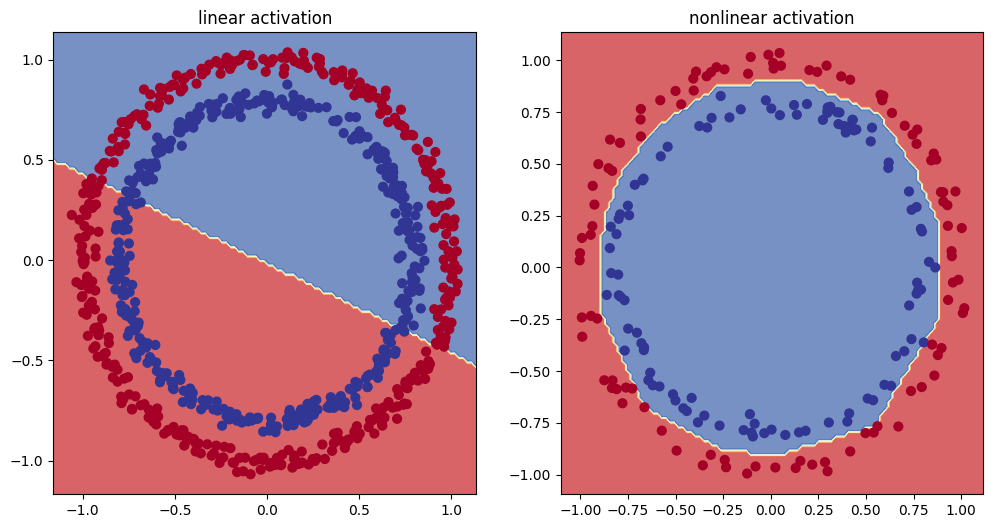

In [63]:
#plot decision boundary
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('linear activation')
plot_decision_boundary(model_1, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title('nonlinear activation')
plot_decision_boundary(model_3, X_test, y_test)

## 7. Replicatin' non-linear activation functions

In [76]:
#create a tensor
A = torch.arange(-10, 10, 1, dtype=torch.float32)
A

tensor([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,   1.,
          2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.])

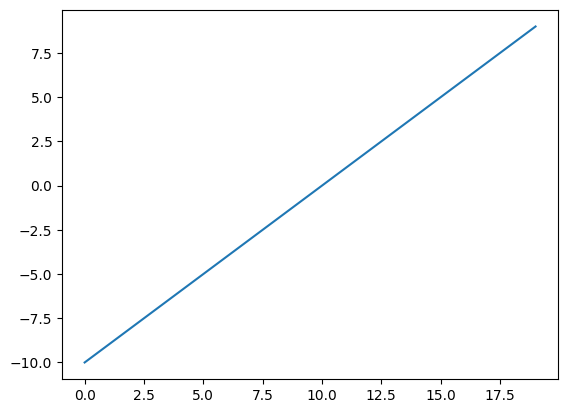

In [65]:
#visualize the tensor
plt.plot(A);

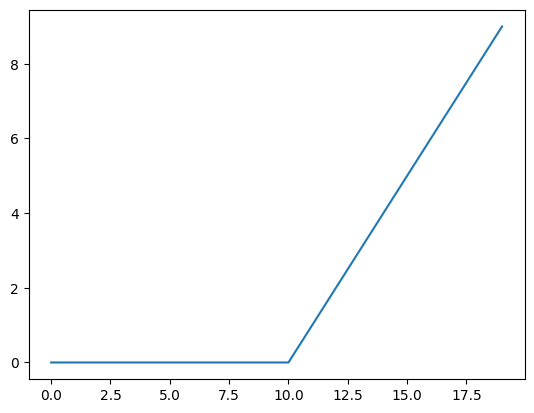

In [68]:
plt.plot(torch.relu(A));

In [70]:
def relu(x: torch.Tensor) -> torch.Tensor:
    return torch.maximum(torch.tensor(0), x)

relu(A)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6., 7.,
        8., 9.])

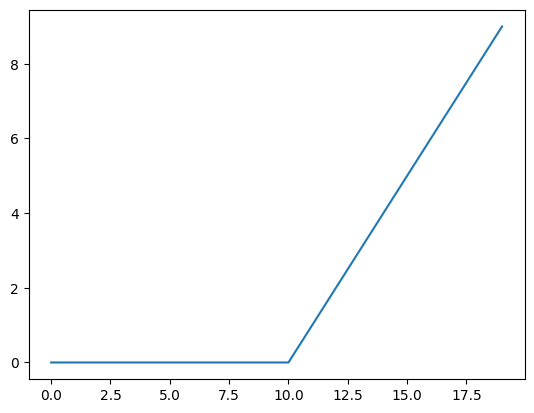

In [71]:
# plot ReLU activation function
plt.plot(relu(A));

In [73]:
def sigmoid(x):
    return 1 / (1 + torch.exp(-x))

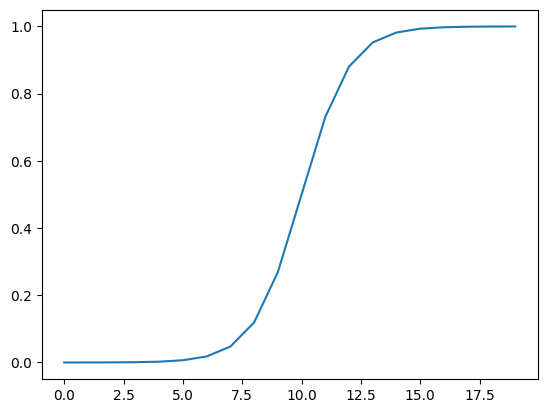

In [74]:
plt.plot(torch.sigmoid(A))

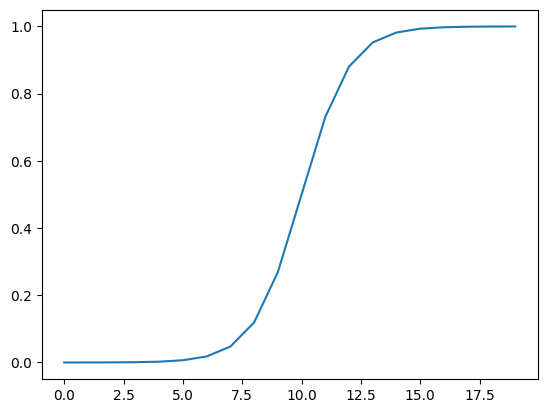

In [77]:
plt.plot(sigmoid(A));

## 8. putting it all together with a multi-class classification problem

* binary classification = one thing or another

* multi-class classification = more than one thing or another



In [ ]:
### creating a toy multi-class dataset

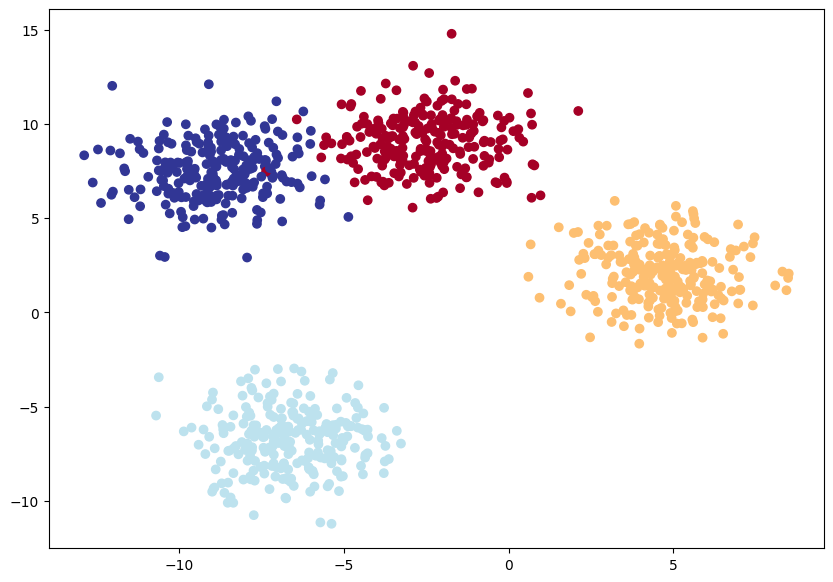

In [80]:
# import dependencies
import torch
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

#set the hyperparameters for data science
NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED = 42

#1. CREATE multiclass data
X_blob, y_blob = make_blobs(n_samples=1000,
                            n_features=NUM_FEATURES,
                            centers = NUM_CLASSES,
                            cluster_std=1.5,
                            random_state= RANDOM_SEED)

# 2.  turn data into tensors
X_blob = torch.from_numpy(X_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.float)

#3. split into train and test
X_blob_train, X_blob_test, y_blob_train, y_blob_test = train_test_split(X_blob,
                                                                        y_blob,
                                                                        test_size=0.2,
                                                                        random_state=RANDOM_SEED)

#4. plot data()
plt.figure(figsize=(10, 7))
plt.scatter(X_blob[:, 0], X_blob[:, 1], c=y_blob, cmap=plt.cm.RdYlBu)

In [ ]:
class